# Curs 7: Preprocesarea datelor si invatare nesupervizata

Invatarea nesupervizata a datelor trateaza cazul in care datele nu sunt etichetate, adica nu au nicio indicatie - fie ea de natura continua sau discreta - asociata. Orice problema de clasificare sau de regresie se poate transforma intr-o problema de invatare de tip nesupervizat, prin inlaturarea etichetei aferente fiecarei inregistrari. 

Discutam in acest curs doua tipuri de invatare nesupervizata: 
* transformare nesupervizata a datelor
* clustering

Aceste operatii se folosesc frecvent in etapa de explorare a datelor, de exemplu pentru a capata rapid o idee despre structura datelor. In alte cazuri se aplica pe post de metode de preprocesare, de exemplu pentru a aduce valorile de pe dimensiuni diferite la aceleasi scale sau pentru a micsora numarul de date. 

## 7.1 Transformarea nesupervizata a datelor

Transformarea nesupervizata a datelor vizeaza obtinerea unei noi reprezentari a setului initial cu scopul de a le face mai usor de inteles de oameni sau mai utile pentru un algoritm de ML. De exemplu, reducerea de la un numar mare de dimensiuni la 2 sau 3 dimensiuni permite reprezentarea grafica si obtinerea rapida a unei vederi initiale bune asupra datelor. 

### 7.1.1. Scalarea datelor

Anumiti algoritmi, precum cei bazati pe calcul de distante sau cei ce lucreaza cu stochastic gradient descent sunt senzitivi la scala datelor: ei necesita ca datele sa fie cu acelasi odin de marime. De exemplu, pentru cazul in care pentru doi vectori $n$-dimensionali $\mathbf{x} = (x_1, \dots, x_n)$ respectiv $\mathbf{y} = (y_1, \dots, y_n)$ se calculeaza distanta dintre ei cu metrica Euclidiana:
$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum\limits_{i=1}^n (x_i - y_i)^2 }
$$
daca pentru primul indice (prima dimensiune) valorile sunt de ordinul sutelor iar pentru restul dimensiunilor valorile sunt de ordinul zecilor de unitati, atunci valoarea distantei este practic determinata doar de diferenta intre prima dimensiune a fiecarui vector; celelalte dimensiuni au influenta mult redusa (comparati sutimi de unitati cu zeci de mii de unitati).  

Exista urmatoarele metode populare de scalare:
1. scalarea min-max: toate trasaturile (dimensiunile) sunt transformate in mod independent, astfel incat valorile minime si maxime pe respectiva trasatura sa fie intre un minim si un maxim date. Implementarea e simpla, se calculeaza pentru fiecare dimensiune minimul si maximul, apoi diferenta dintre fiecare valoare si minimul seriei sale este impartita la diferenta intre maximul si minimul seriei din care face parte;
1. standardizarea: fiecare dimensiune e astfel transformata incat sa aiba media zero si deviatia standard 1; aceasta se obtine prin: se calculeaza media si deviatia standard pentru fiecare dimensiune; fiecare serie (dimensiune) se transforma prin impartirea diferentei dintre valorile din seria originara si media seriei la deviatia standard; 
1. scalarea robusta: ca la punctul anterior, dar se folosesc mediana si quartile ale datelor din fiecare serie, independent;
1. normalizarea: se imparte orice vector (presupus nenul) la norma sa. Norma se alege convenabil. In urma transformarii, orice vector va avea norma 1 si se va gasi pe hipersfera de raza 1 centrata in origine. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
data_cancer = load_breast_cancer()
data_names = data_cancer.feature_names
print(data_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
df_cancer = pd.DataFrame(data_cancer.data, columns=data_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Se observa discrepantele majore intre valorile minime si maxime:

In [5]:
df_cancer.describe().loc[['min', 'max']]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
min,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0000,0.0000,0.106,0.04996,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504
max,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.4268,0.2012,0.304,0.09744,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750


Reprezentare grafica:

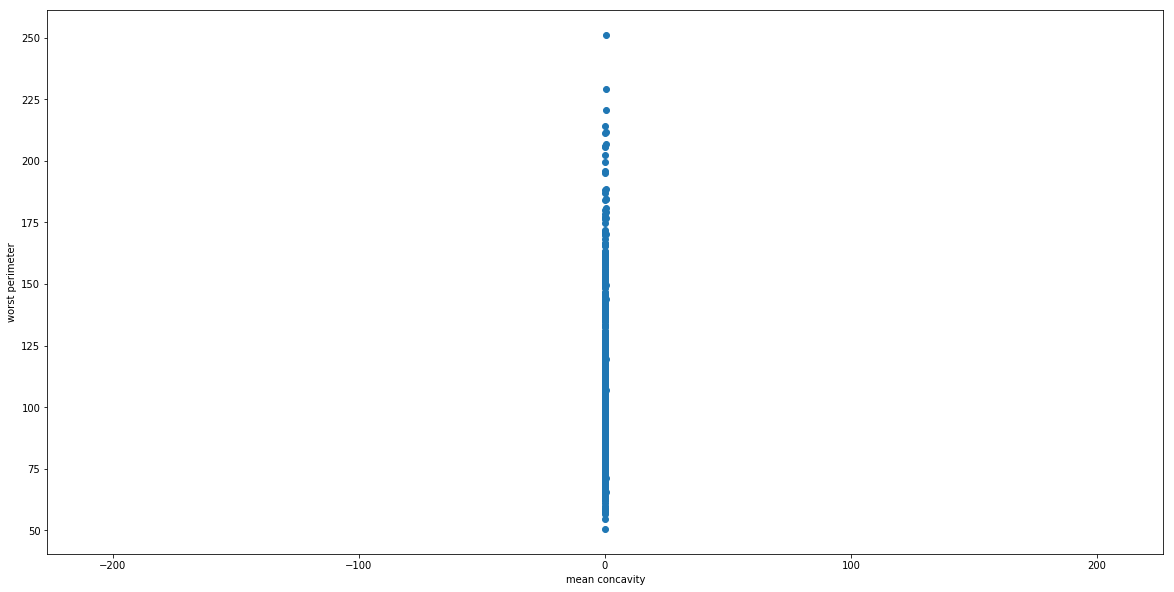

In [6]:
feature1 = 'mean concavity'
feature2 = 'worst perimeter'
plt.figure(figsize=(20, 10))
plt.axis('equal')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.scatter(df_cancer[feature1], df_cancer[feature2])

In [7]:
# import seaborn as sns
# sns.set(style="ticks")
# sns.pairplot(df_cancer)

In cazul in care setul de date esta impartit in set de antrenare si set de validare sau de testare, parametrii folositi pentru transformarea datelor trebuie sa fie retinuti si reutilizati pentru a face aceleasi transformari pe setul exterior celui de antrenare. Este gresit ca seturile de testare sau de validare sa fie transformate cu alte valori, pentru ca modelul (de clasificare/regresie/clustering) determinat pe setul de antrenare are sanse reale sa nu functioneze pe date din cu totul alte intervale.

Exemple de aplicare a transformarilor:

In [8]:
#etichetele y_* sunt utile pentru a demonstra utilitatea scalarii
X_train, X_test, y_train, y_test = train_test_split(data_cancer.data, data_cancer.target, test_size=1/3)
print(X_train.shape)
print(X_test.shape)

(379, 30)
(190, 30)


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
#se observa ca datele din X_train nu sunt modificare
print(np.min(X_train, axis=0))

[  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   6.25100000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   4.99600000e-02   1.11500000e-01   3.60200000e-01
   7.71400000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   7.88200000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56500000e-01   5.50400000e-02]


In [11]:
#dar obiectul de scalare castiga in starea lui valorile minime si maxime pe fiecare trasatura:
print(min_max_scaler.data_min_ == np.min(X_train, axis=0))
print(min_max_scaler.data_max_ == np.max(X_train, axis=0))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [12]:
X_train_scaled = min_max_scaler.transform(X_train)
print(np.min(X_train_scaled, axis=0), '\n', np.max(X_train_scaled, axis=0), sep='')

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


Frecvent se cere atat determinarea parametrilor de transfromare, cat si aplicarea transformarii pe un acelsi set de date:

In [13]:
X_train_scaled = min_max_scaler.fit_transform(X_train)

Transformarea setului de testare se face folosind acelasi obiect de scalare obtinut (fitted) pe setul de antrenare

In [14]:
X_test_scaled = min_max_scaler.transform(X_test)

Daca setul de testare face parte din aceeasi distributie ca si cel de antrenare, ar trebui ca valorile minima si maxime obtinute pe setul de testare sa fie aproximativ 0 si 1:

In [15]:
#minim pe setul de testare, pe fiecare trasatura
np.min(X_test_scaled, axis = 0)

array([ 0.03849004,  0.03990531,  0.02986046,  0.01780204, -0.09792844,
        0.02691668,  0.        ,  0.        ,  0.14090909,  0.00610783,
        0.00230433,  0.01768034, -0.00155196,  0.00302195,  0.03824319,
        0.01095022,  0.        ,  0.        ,  0.04494382,  0.00742993,
        0.04103175,  0.01252665,  0.03829169,  0.01869588,  0.08531995,
        0.01550388,  0.        ,  0.        ,  0.01636113,  0.00111505])

In [16]:
#maxim pe setul de testare, pe fiecare trasatura
np.max(X_test_scaled, axis = 0)

array([ 1.0439745 ,  0.72404464,  1.04627287,  1.119155  ,  0.81464962,
        1.2324966 ,  1.00093809,  1.05175118,  0.93232323,  0.90564448,
        2.1942789 ,  0.70893741,  2.28575432,  3.08768267,  0.7348472 ,
        0.71956019,  1.30348914,  1.34428317,  1.32643996,  1.31777539,
        1.11547619,  0.93656716,  1.1224216 ,  1.33455786,  0.97226441,
        0.88347838,  0.93450479,  0.98522337,  0.78710822,  0.56316411])

Exemplul de mai sus se aplica cu mimime modificari altor metode de scalare:

In [17]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train_std = standard_scaler.fit_transform(X_train)
print('valori medii: ', np.mean(X_train_std, axis = 0))
print('deviatie standard: ', np.std(X_train_std, axis = 0))

valori medii:  [ -2.59745318e-15   2.56391214e-15   6.04148804e-15   4.71332150e-16
   2.54062382e-15  -1.20689152e-16  -9.26845818e-16  -5.76788690e-16
  -2.19056670e-15   1.62716147e-16   1.18111325e-15   3.21642449e-16
   2.26731562e-16   7.20619694e-16  -1.36712687e-15   2.75944615e-16
   1.74003292e-16   1.33314643e-15  -2.62762547e-15  -5.97879998e-16
  -2.54326024e-15   6.19850111e-16   1.06393932e-15  -6.60568053e-16
  -1.80154924e-15  -1.31820676e-16  -5.92314236e-16   3.89603331e-17
   1.85251990e-15   3.43319627e-15]
deviatie standard:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


Utilitatea aplicarii unei astfel de preprocesari este data mai jos:

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#varianta cu date nescalate

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.91578947368421049

In [20]:
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
knn_scaled.score(X_test_scaled, y_test)

0.97894736842105268

Desigur, putem constata si efectul pe datele standardizate:

In [21]:
knn_std = KNeighborsClassifier(n_neighbors=3)
knn_std.fit(X_train_std, y_train)
X_test_std = standard_scaler.transform(X_test)
knn_std.score(X_test_std, y_test)

0.98421052631578942

### 7.1.2. Reducerea dimensionalitatii

Frecvent, datele disponibile au un numar mare de dimensiuni. In destule cazuri se poate renunta la unele din ele, fara a peirde informatie esentiala. In plus, se castiga in viteza de calcul, deoarece se ajunge sa se lucreze cu mai putine trasaturi. In destule situatii se poate ajunge la doua trasaturi numerice care pot fi reprezentate in plan, dand posibilitatea unei explorari initiale. 

Cea mai populara transformare este analiza componentelor principale (Principal Component Analysis, PCA) care se obtine prin metode algebrice relativ simple. 

Bibliografie recomandata pentru prezentare matematica este:
1. [A tutorial on Principal Components Analysis](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)
1. [A Tutorial on Principal Component Analysis](https://arxiv.org/abs/1404.1100)
1. [PCA Whitening](http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/)

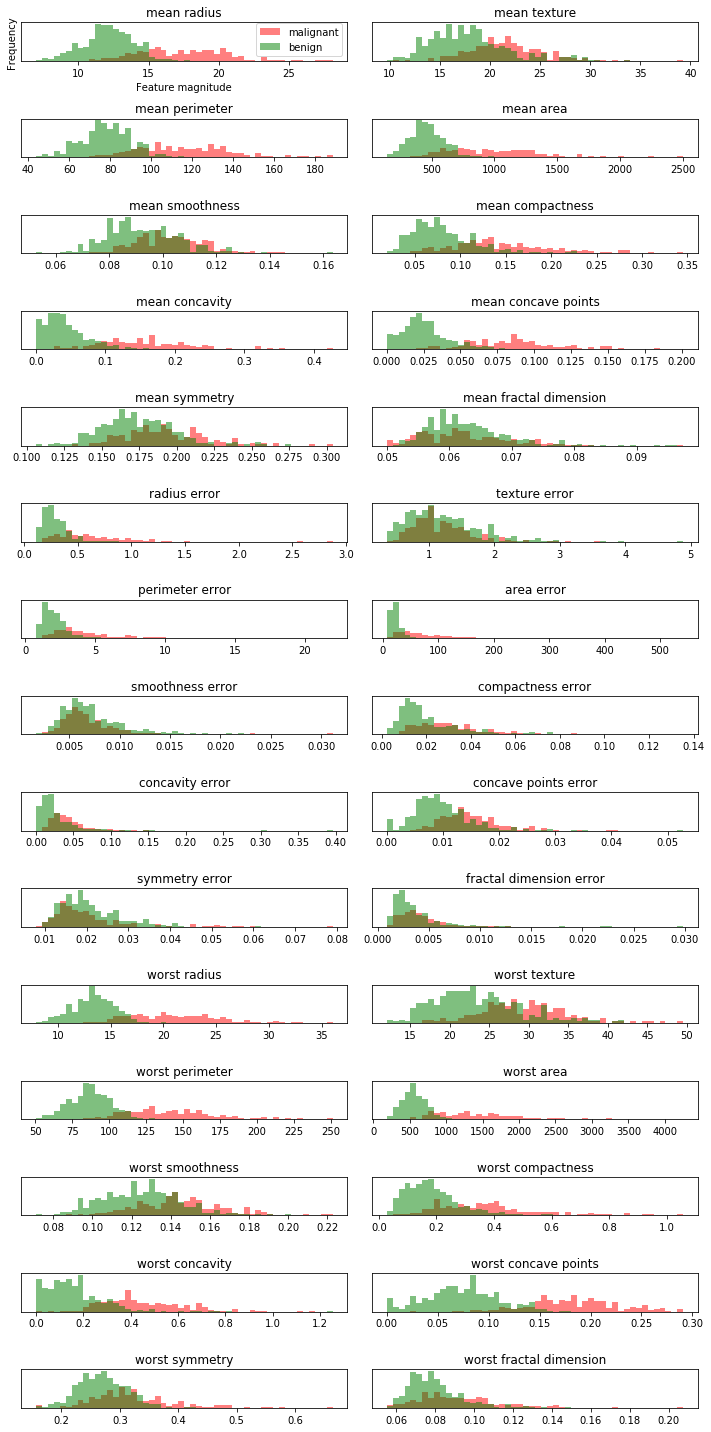

In [22]:
#sursa: Introduction to Machine Learning with Python, chapter 03

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = data_cancer.data[data_cancer.target == 0]
benign = data_cancer.data[data_cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(data_cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='green', alpha=.5)
    ax[i].set_title(data_cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In histogramele anterioare se observa ca diferite trasaturi individuale au o putere discriminativa mai mica sau mai mare. Ne intereseaza sa consideram doua tarsaturi (nu neaparat din cele originare, pot fi si combinatii liniare ale acestora) astfel incat separarea intre malign si benign sa fie mai clara.

In [23]:
X_cancer, y_cancer = data_cancer.data, data_cancer.target

#se aplica in prealabil o scalare a datelor de intrare
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cancer)

In [24]:
#aplicarea PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


Text(0,0.5,'PCA feature 2')

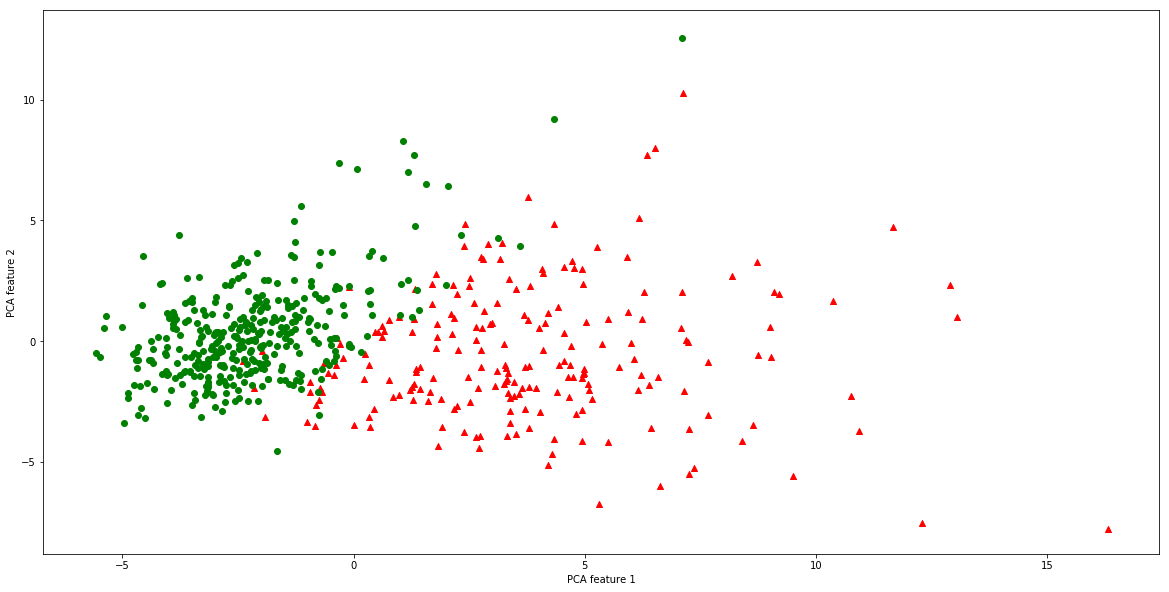

In [25]:
X_pca_malign = X_pca[y_cancer == 0]
X_pca_benign = X_pca[y_cancer == 1]

plt.figure(figsize=(20, 10))
plt.scatter(X_pca_malign[:, 0], X_pca_malign[:, 1], c='r', marker='^')
plt.scatter(X_pca_benign[:, 0], X_pca_benign[:, 1], c='g', marker='o')
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')


Trasaturile determinate de PCA sunt obtinute pe baza unor transformari liniare ale trasaturilor din setul originar. Se pot afisa coeficientii transformarii liniare:

In [26]:
print('Coeficientii pentru PCA feature 1, respectiv PCA feature 2:', pca.components_)

Coeficientii pentru PCA feature 1, respectiv PCA feature 2: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


O alta metoda destul de populara pentru extragerea de trasaturi este t-SNE. O excelenta prezentare a unuia din autorii algoritmului, Laurens van der Maaten, este [aici](https://www.youtube.com/watch?v=RJVL80Gg3lA). Articolele care prezinta variante ale algoritmului sunt [pe siteul autorului](https://lvdmaaten.github.io/tsne/). Exemplificarea se face pe setul de date `digits` din sklearn:

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

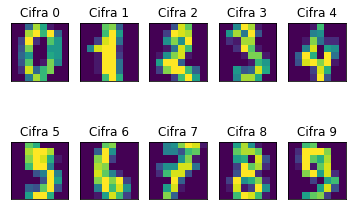

In [28]:
fig, axes = plt.subplots(2, 5, subplot_kw = {'xticks':(), 'yticks':()})
for ax, img, img_cls in zip(axes.ravel(), digits.images, digits.target_names):
    ax.imshow(img)
    ax.set_title('Cifra ' + str(img_cls))

Text(0,0.5,'Second principal component')

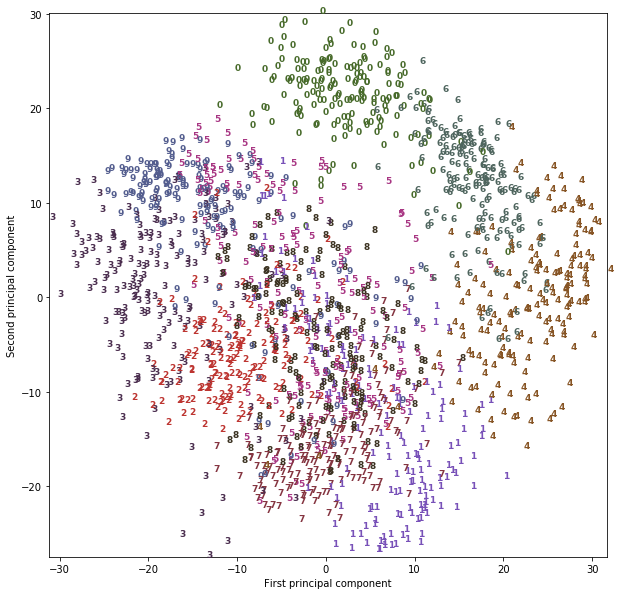

In [29]:
#sursa: https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb

# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")



Prin t-SNE se obtin trasaturi mult mai bine diferentiate:

In [30]:
# sursa: https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0,0.5,'t-SNE feature 1')

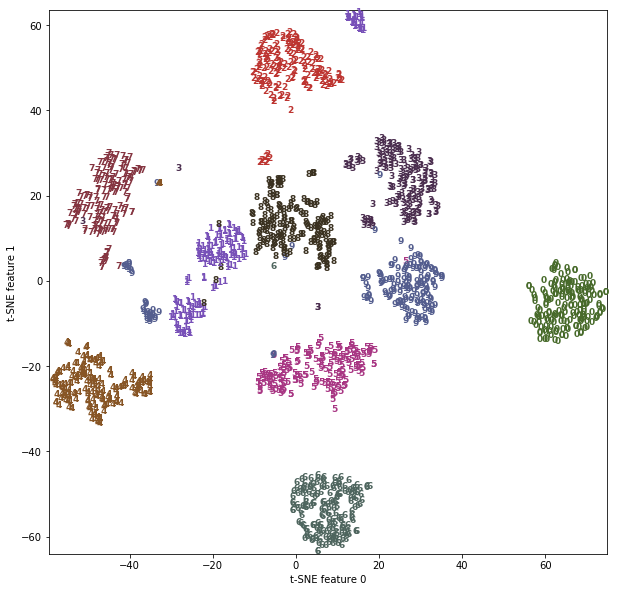

In [31]:
# sursa: https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

## 7.2. Clustering-ul
Clusteringul vizeaza obtinerea de partitii ale setului initial de date. Intre elementele care apartin aceluiasi cluster se considera ca exista relatii de similaritate mai mari decat intre elemente care apartin unor clustere diferite. De exemplu, se doreste impartirea unor imagini cu oameni, in grupuri cu similaritate interna; nu se cunoaste nimic despre indentitatea persoanelor din poze sau metadate. 

### 7.2.1 K-means
K-means este cel mai popular algoritm de clustering. El incearca sa grupeze datele in $k$ clustere. Fiecare cluster este definit printr-un centru de greutate (centroid), ale carui coordonate sunt mediile aritmetice ale coordonatelor punctelor care apartin de acelasi cluster. Un punct din setul de instruire sau de testare este asociat cu cel mai apropiat centroid. 

Bibliografie: 
1. [K-means, Stanford CS 221](http://stanford.edu/~cpiech/cs221/handouts/kmeans.html)
1. [K-means and Hierarchical Clustering, Tutorial Slides by Andrew Moore](https://www.autonlab.org/tutorials/kmeans.html)
1. [Curs Sisteme computationale inteligente](https://github.com/lmsasu/cursuri/blob/master/SistemeComputationaleInteligente/SistemeComputationaleInteligente.pdf) sectiunea 8.4

Ideea de baza este de a determina prin pasi succesivi o pozitionare a centroizilor, precum si o impartire a setului initial de instruire in subseturi (posibil, desi arareori, vide) asociate fiecarui centroid. 

![k-means](./images/kmeans.png)
Sursa: ref [1] de mai sus.

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [33]:
X, y = make_blobs()
X.shape

(100, 2)

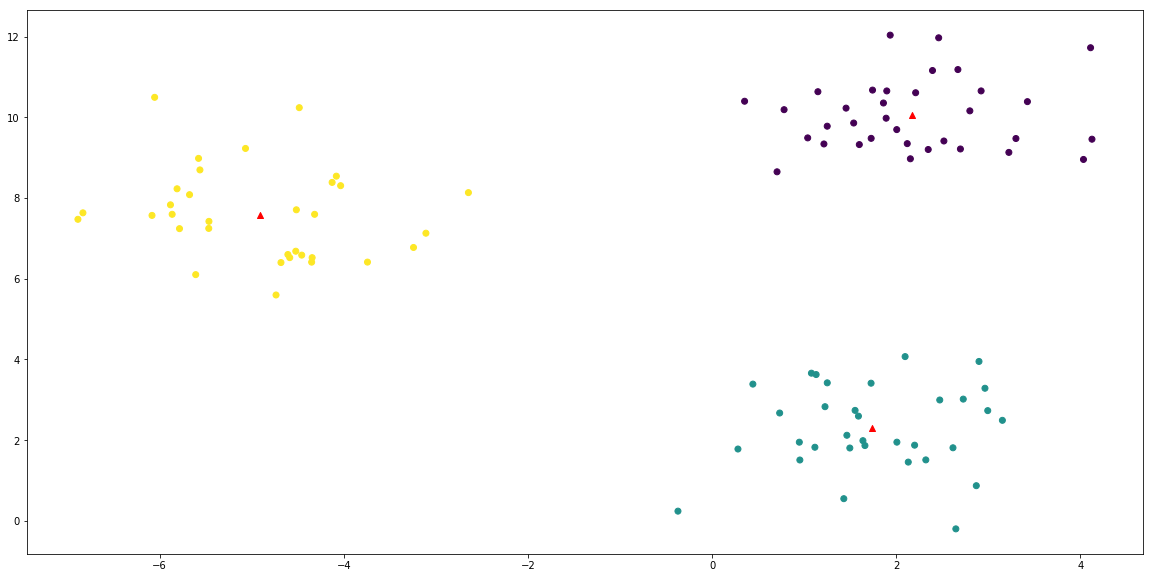

In [34]:
plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red')

Urmatoarele situatii sunt defavorabile pentru algoritmul k-means:
1. numar de clustere necunoscut apriori
1. cazul in care datele nu au forma aproximativ globulara si de diametre egale
1. densitati de distributie diferite in clustere
1. alegere neinspirata a pozitiilor centroizilor; pot rezulta centroizi care partitioneaza un grup de puncte; pot rezulta centroizi orfani = fara puncte asociate
1. nu trateaza bine situatiile in care clusterele nu sunt sferice.

Pentru aceasta ultima situatie dam exemplul de mai jos:

In [35]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

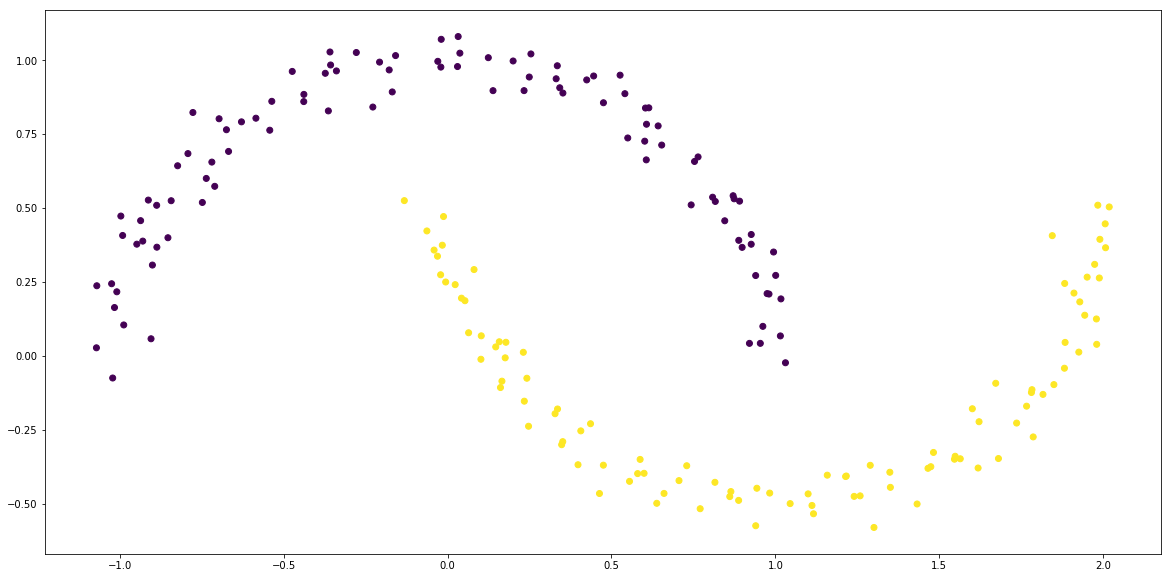

In [36]:
plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)

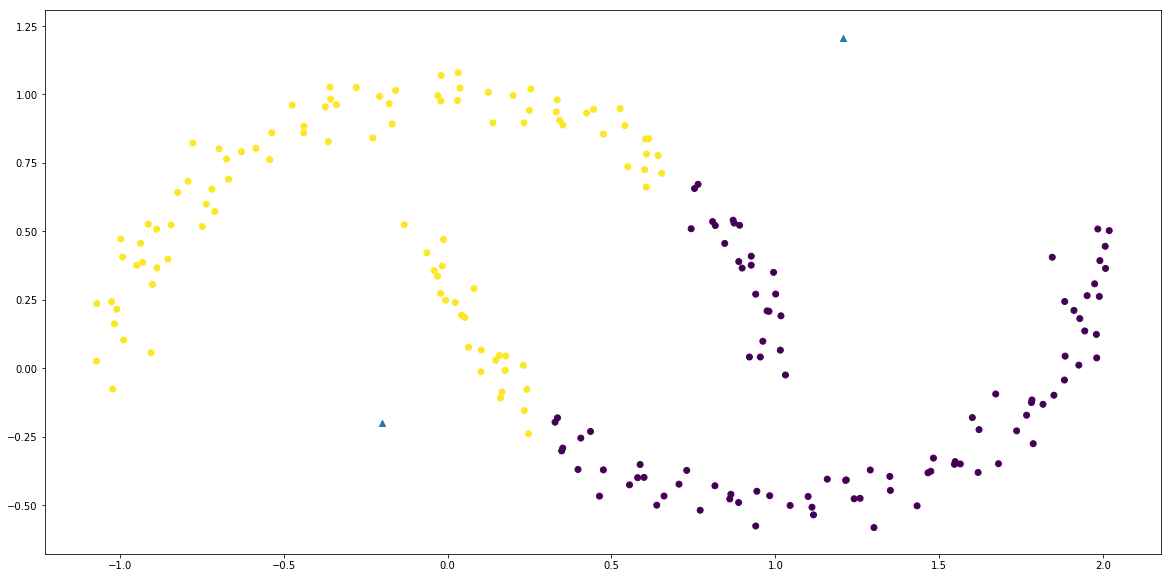

In [37]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], marker='^')

Pentru situatia in care determinarea apartenentei de clustere este data de densitatea de repartitie, mai degraba decat de distanta (cum e cazul de mai sus), sunt recomandati algoritmi precum DBSCAN. 

Ideea algoritmului DBSCAN este de a determina clustere ce acopera regiuni dense de date; clusterele sunt separate de regiuni cu densitate mica. DBSCAN nu necesita precizarea apriori a numarului de clustere (cu toate ca are alti hiperparametri ce trebuie specificati); in plus, poate eticheta unele date ca fiind zgomot, adica neafiliate niciunui cluster. 

Bibliografie:
1. [A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
dbscan = DBSCAN()#valoarea implicita pentru eps e 0.5
clusters = dbscan.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Rezulattul de mai sus arata ca se obtine un singur cluster. Prin modificarea valorilor hiperparametrilor eps si min_samples se obtin rezultate complet diferite:

In [40]:
dbscan = DBSCAN(eps=0.25, )
clusters = dbscan.fit_predict(X)
clusters

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

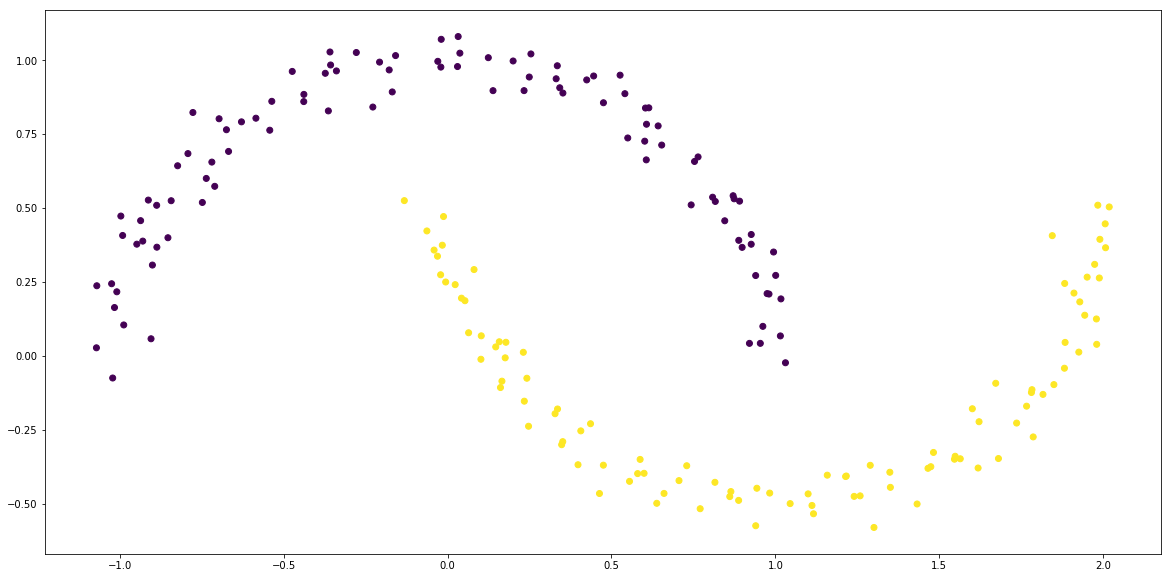

In [41]:
plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], c=clusters)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], marker='^')